In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
twitter_data = pd.read_json('tweets_GOOG18-19_mod.json', orient='split')
stock_data = pd.read_json('GOOGL-18-19.json')

In [146]:
if(len(twitter_data) != len(stock_data)):
    twitter_data = twitter_data[:-(len(twitter_data) - len(stock_data))]

import datetime
print(twitter_data.columns)
print(len(twitter_data))
print(stock_data.columns)
print(len(stock_data))
twitter_dataMod = twitter_data
print(len(twitter_dataMod))

twitter_dates = list(twitter_data.get('dates'))
stock_dates = list(stock_data.index)

stock_date = [k.ctime() for k in stock_dates]
stock_nptime = np.array([np.datetime64(k, 'D') for k in stock_dates])
print(stock_nptime)

minTime = '2018-01-01'
maxTime = '2019-07-08'

dates = np.arange(np.datetime64(minTime), np.datetime64(maxTime))
dates = dates[np.is_busday(dates)]
datesIncluded = len(dates)

print([k for k in dates if k not in stock_nptime])

Index(['dates', 'vader_mean', 'vader_std', 'volume', 'mean_exist',
       'std_exist'],
      dtype='object')
380
Index(['APO', 'Aroon Down', 'Real Middle Band', 'MIDPOINT', 'OBV', 'SINE',
       'QUADRATURE', 'open', 'close', 'nopen', 'nhigh', 'nlow', 'nclose',
       'nvolume'],
      dtype='object')
380
380
['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-08'
 '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-22' '2018-01-23'
 '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-05' '2018-02-06'
 '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-12' '2018-02-13'
 '2018-02-14' '2018-02-15' '2018-02-16' '2018-02-20' '2018-02-21'
 '2018-02-22' '2018-02-23' '2018-02-26' '2018-02-27' '2018-02-28'
 '2018-03-01' '2018-03-02' '2018-03-05' '2018-03-06' '2018-03-07'
 '2018-03-08' '2018-03-09' '2018-03-12' '2018-03-13' '2018-03-14'
 '2018-03-15' '2018-03-16' '

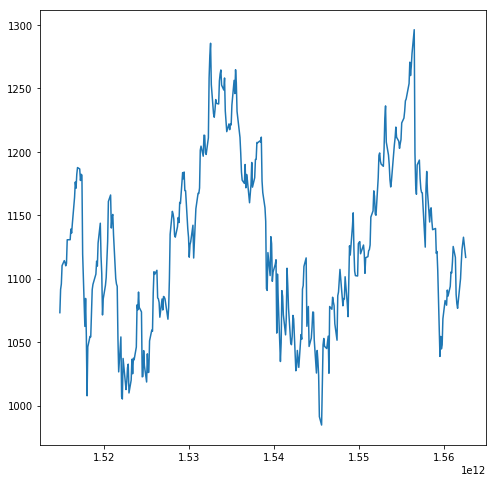

In [147]:
plt.figure(figsize=(8, 8))
plt.plot(twitter_dataMod.get('dates'), stock_data.get('close'))

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)

# Shift the data to enable one-step t + 1 prediction

# Build the x and y values, note: x includes the previous opening price and closing prices

LAG_STEPS = 3 # Counted including implied lag step of 1

dataLength = len(twitter_dataMod)-1

#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod = stock_data.drop(stock_data.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod2 = stock_data.drop(stock_data.index[np.array(range(LAG_STEPS*2))])
twitter_dataMod2 = twitter_dataMod.to_numpy()
scaler.fit(twitter_dataMod2[:,3].reshape(-1, 1))
twitter_dataMod2[:,3] = np.ravel(scaler.transform(twitter_dataMod2[:,3].reshape(-1,1)))
twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)

stock_dataMod = stock_data.to_numpy()
scaler.fit(stock_dataMod)
stock_dataMod = scaler.transform(stock_dataMod)
stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)

stock_dataMod2 = stock_data.to_numpy()
scaler.fit(stock_dataMod2)
stock_dataMod2 = scaler.transform(stock_dataMod2)
stock_dataMod2 = np.delete(stock_dataMod2, [0,1,2,3,4,5,6,9,10,11,12,13], axis = 1)


for i in range(LAG_STEPS, dataLength):
    temp_twitter = (twitter_dataMod2[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock = (stock_dataMod[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock2 = (stock_dataMod[i - np.array(range(1, 1+LAG_STEPS))]).reshape(1,-1)
    if i == LAG_STEPS:
        x_unscaled = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
    else:
        temp_arr = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
        x_unscaled = np.concatenate((x_unscaled, temp_arr), axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)
#twitter_dataMod2 = np.delete(twitter_dataMod2, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)
#stock_dataMod = np.delete(stock_dataMod, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#stock_dataMod2 = stock_data.to_numpy()
#stock_dataMod2 = np.delete(stock_dataMod2, range(7), axis = 1)
#stock_dataMod2 = np.delete(stock_dataMod2, range(LAG_STEPS*2), axis = 0)

#x = np.vstack((twitter_dataMod2.get('vader_mean'), twitter_dataMod2.get('vader_std'), 
#          twitter_dataMod2.get('volume'), twitter_dataMod2.get('mean_exist'),
#          twitter_dataMod2.get('std_exist'))).T

#x2 = np.vstack((temp_stockMod[:, 0], temp_stockMod[:, 1], temp_stockMod[:, 2], 
#          temp_stockMod[:, 3], temp_stockMod[:, 4], temp_stockMod[:, 5],
#          temp_stockMod[:, 6], temp_stockMod2[:, 7], temp_stockMod2[:, 8])).T

#x_unscaled = np.concatenate((x, x2), axis=1)


#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[0, 119]])
#stock_dataMod = stock_data.drop(stock_data.index[[0, 119]]).to_numpy()
#stock_dataMod2 = stock_data.drop(stock_data.index[[118, 119]]).to_numpy()

print(len(x_unscaled))
print(x_unscaled[0])
print(len(x_unscaled[0]))

stock_dataMod3 = stock_data.drop(stock_data.index[range(LAG_STEPS)]).to_numpy()

y_open = stock_dataMod3[:, 7]
y_close = stock_dataMod3[:, 8]
y_classifier = np.empty(y_open.size-1, dtype = int)

for i in range(y_open.size-1):
    y_classifier[i] = 1 * (y_open[i+1] >= y_open[i])

y_open = np.delete(y_open, 0)
y_close = np.delete(y_close, 0)

y_open = y_open.reshape(-1, 1)
y_close = y_close.reshape(-1, 1)
y_classifier = y_classifier.reshape(-1, 1)

print(y_open.size)
print(y_classifier.size)

376
[ 0.24772976  0.44472734  1.00333291  1.          1.          0.22167922
  0.46288545 -0.58753563  1.          1.          0.24183636  0.52487813
 -0.58753563  1.          1.          0.59868679 -0.80761959 -1.73215525
 -1.8749049   0.19815238 -1.49561189  0.22364401 -1.01860627 -1.10187236
 -0.87702868 -0.93654293 -0.4990864   0.55571191 -0.76105153 -1.77128049
 -1.97683748  0.02300521 -1.60559274  0.09542587 -1.06038989 -1.20765621
 -0.94008225 -1.09031179 -0.30161482  0.50193992 -0.71448067 -1.80619823
 -2.06246085 -0.12820524 -1.56407259 -0.13212262 -1.25102765 -1.28631601
 -1.0788001  -1.12158682 -0.12971655  0.55571191 -0.76105153 -1.77128049
 -1.97683748  0.02300521 -1.60559274  0.09542587 -1.06038989 -1.20765621
 -0.94008225 -1.09031179 -0.30161482  0.50193992 -0.71448067 -1.80619823
 -2.06246085 -0.12820524 -1.56407259 -0.13212262 -1.25102765 -1.28631601
 -1.0788001  -1.12158682 -0.12971655  0.45600663 -1.27331975 -1.84051748
 -2.1655737  -0.3100614  -1.53459646 -0.3575205

In [149]:
# standardize the data
from sklearn.preprocessing import StandardScaler
# import the splitting library
from sklearn.model_selection import train_test_split

def splitData(x, y, val):
    if not(val):
        x_train = x[range(int(0.8*len(x)))]
        y_train = y[range(int(0.8*len(x)))]
        x_test = x[range(int(0.8*len(x)), len(x))]
        y_test = y[range(int(0.8*len(x)), len(x))]
        scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
        return x, x_train, x_test, y_train, y_test
    else:
        x_temp = np.array_split(x[range(int(0.8*len(x)))], 15)
        y_temp = np.array_split(y[range(int(0.8*len(x)))], 15)
        
        x_train = np.array([arr[range(len(arr)-3)] for arr in x_temp])
        x_val = np.array([arr[range(len(arr)-3, len(arr))] for arr in x_temp])
        y_train = np.array([arr[range(len(arr)-3)] for arr in y_temp])
        y_val = np.array([arr[range(len(arr)-3, len(arr))] for arr in y_temp])
        
        x_train = x_train.reshape(-1, len(x[0]))
        x_val = x_val.reshape(-1, len(x[0]))
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        
        x_test = x[range(1+int(0.8*len(x)), len(x))]
        y_test = y[range(1+int(0.8*len(x)), len(x))]

        return x, x_train, x_val, x_test, y_train, y_val, y_test

0.9050745426468657
0.7628956514207802
410.24248228515955
909.2888069371561
0.8143630305106713
0.8143630305106713


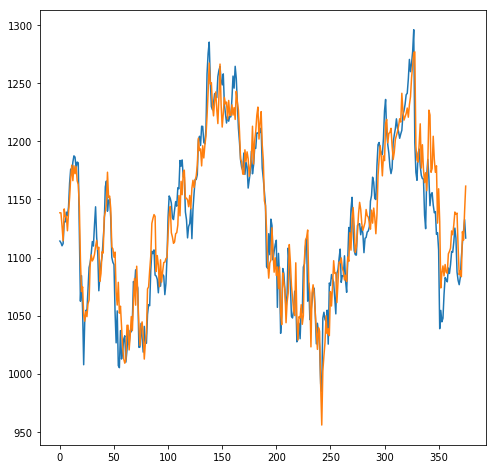

In [150]:
# basic linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import linear_model

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.LinearRegression().fit(x_train, y_train)

print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))



0.001
0.904883974401856
0.7611482007221767
411.0660673597798
915.9902334206258
0.8136849205783638
0.8136849205783638


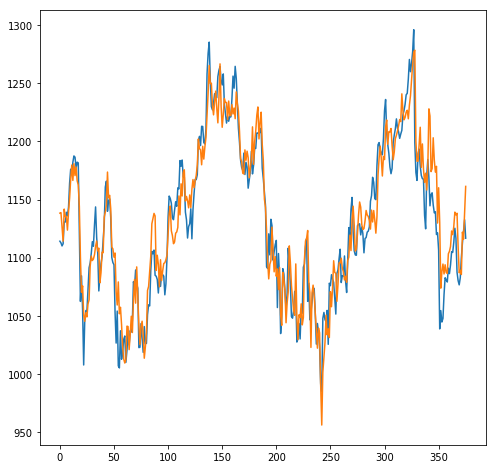

In [151]:
# ridge regression

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
from sklearn import linear_model
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.RidgeCV(alphas = np.logspace(-5, 1, 7), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))


0.7459057944201964
-0.7408017649012377


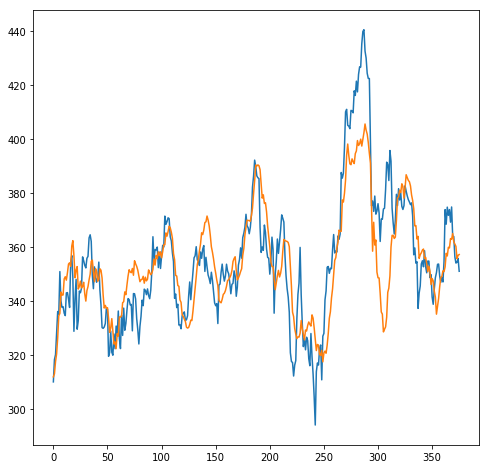

In [11]:
# lasso regression (LARS)

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.LassoLars(alpha = 0.01, fit_path = True, fit_intercept = True, precompute = 'auto', max_iter = 10)

reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.7866666666666666
0.6710526315789473


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


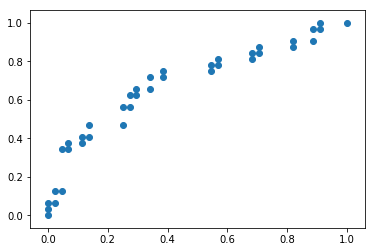

In [12]:
# Logistic regression
# this is actually a classifier

from sklearn import preprocessing
from sklearn.metrics import roc_curve

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_close)

#x_train, x_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

reg = linear_model.LogisticRegression(multi_class = "ovr").fit(x_train, y_train)
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))

fpr, tpr, threshold = roc_curve(y_test, reg.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.8576782567669298
-0.3216714661092388


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


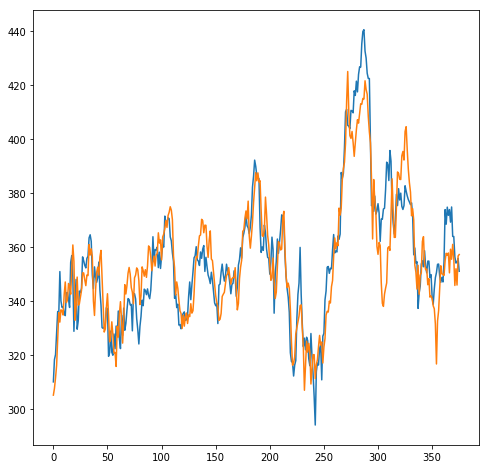

In [13]:
# Bayesian Ridge Regression

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
-5.660140643821073


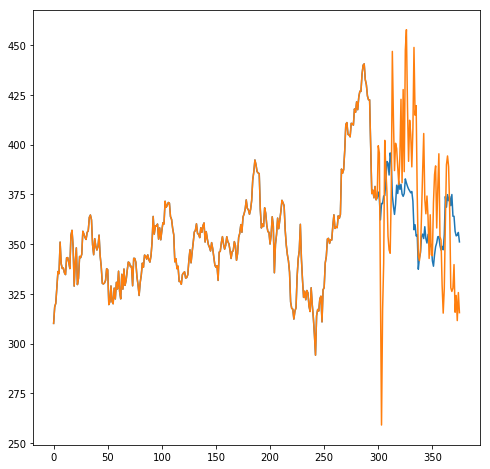

In [14]:
# Extend linear regression to polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

100.0
0.9723422863799337
-1.2681052638262553


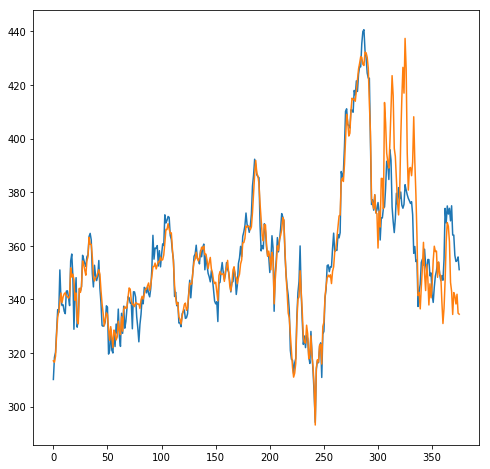

In [15]:
# Extend ridge regression to polynomial 

poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.RidgeCV(alphas = np.logspace(-5, 5, 11), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

0.2672172673515931
-1.322182580583958


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.039e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.039e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


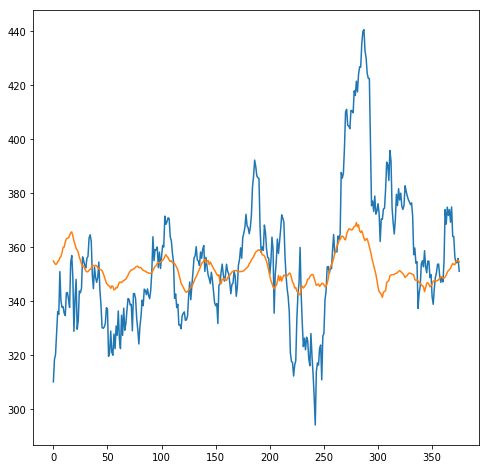

In [16]:
# Extend lasso regression to polynomial
poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.LassoLars(alpha = 0.1, fit_intercept = True, precompute = 'auto',
                            fit_path = True, max_iter = 6)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0
0.4605263157894737


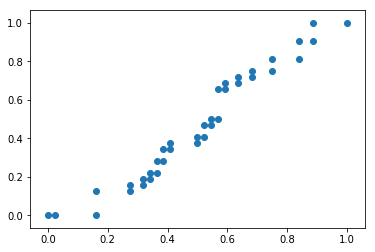

In [17]:
# extend logistic regression to polynomial

poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

from sklearn import preprocessing
from sklearn.metrics import roc_curve


x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)
y_train = lab_enc.fit_transform(np.ravel(y_train))
y_test = lab_enc.fit_transform(np.ravel(y_test))

reg = linear_model.LogisticRegression(multi_class = "ovr").fit(x_train, np.ravel(y_train))
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))

fpr, tpr, threshold = roc_curve(y_test, reg.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

In [ ]:
# extend bayesian regression to polynomial
poly = PolynomialFeatures(degree=3)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

0.998599738657406
-8.095387243708231


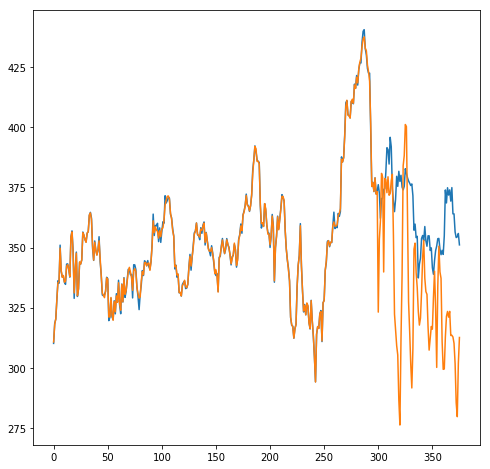

In [18]:
# Kernel ridge regression

from sklearn.kernel_ridge import KernelRidge

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = KernelRidge(alpha=0.01, coef0=1, degree=3, kernel='poly')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.9765376850712402
-0.9623740693929246
0.9933333333333333
0.5921052631578947


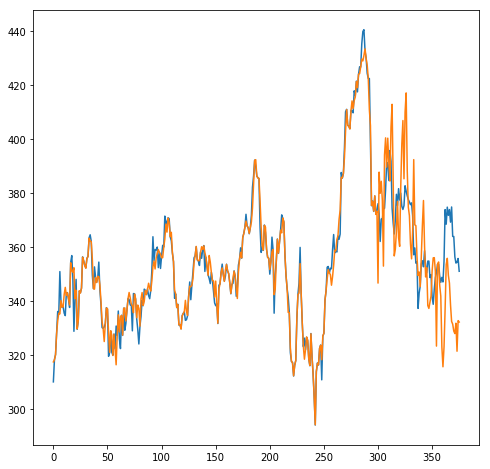

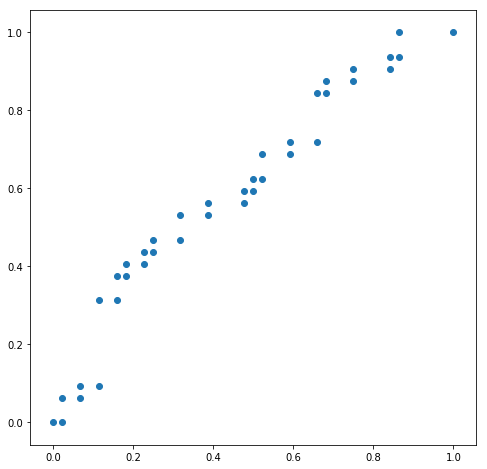

In [19]:
# Support Vector Regression && classification
from sklearn.svm import SVR
from sklearn.metrics import roc_curve

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = SVR(kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))


from sklearn.svm import SVC

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = SVC(kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000, probability = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.9760770010521854
-1.1277159703705912
0.93
0.6578947368421053


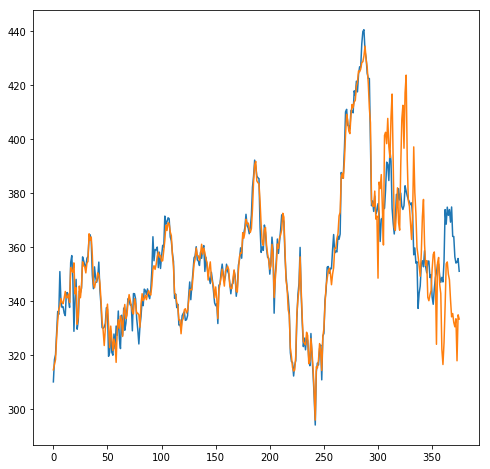

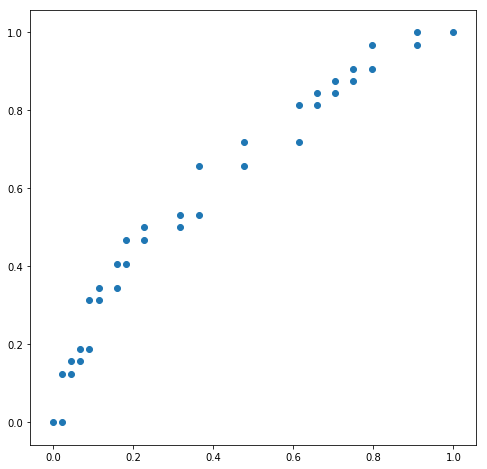

In [28]:
# Support Vector Regression && Classification
from sklearn.svm import NuSVR

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = NuSVR(nu = 0.5, kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn.svm import NuSVC

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = NuSVC(nu = 0.4, kernel='rbf', max_iter=-1, gamma= 0.001, probability = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

1.0
-1.5509633267601406
1.0
0.5


C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


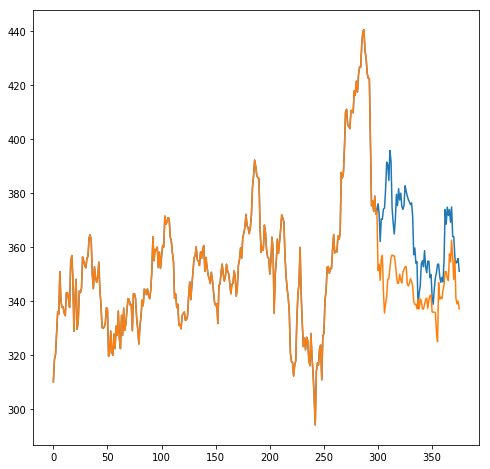

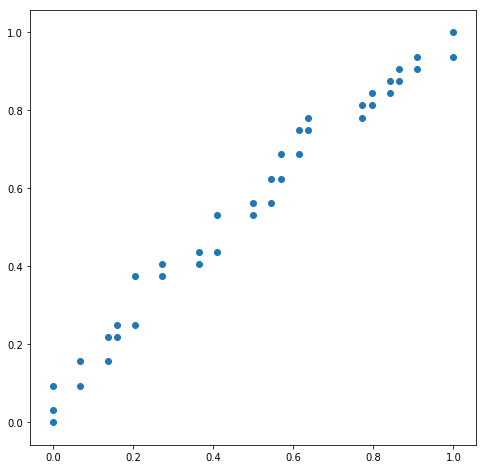

In [29]:
# Nearest Neighbors Regression && Classifier
from sklearn.neighbors import KNeighborsRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = KNeighborsRegressor(n_neighbors=4, weights = 'distance')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn.neighbors import KNeighborsClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = KNeighborsClassifier(n_neighbors=8, weights = 'distance')
cls.fit(x_train, y_train)
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

1.0
-0.7447936150236982


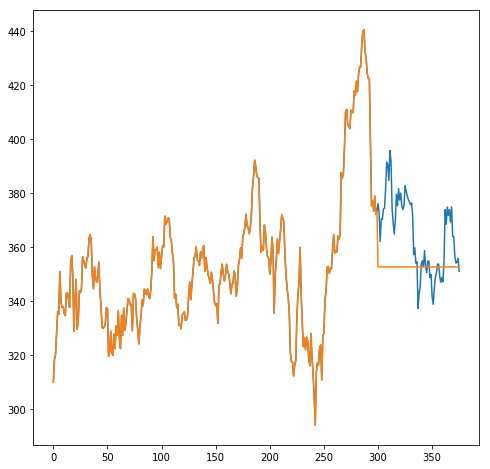

In [30]:
# Gaussian Process Regressor
from sklearn.gaussian_process import GaussianProcessRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = GaussianProcessRegressor(normalize_y = True, alpha = 1e-10)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
-0.7827751496131043
1.0
0.5789473684210527


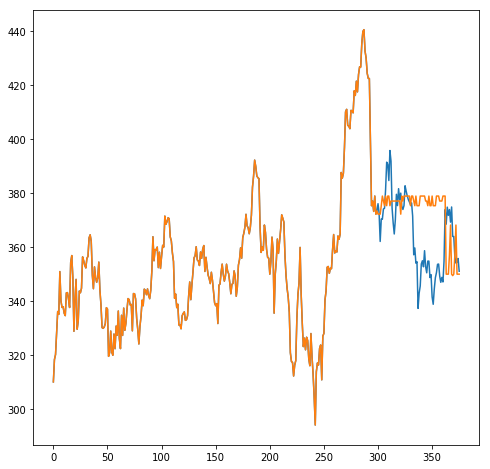

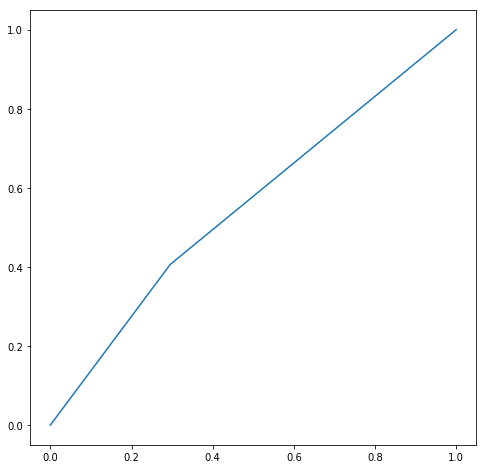

In [22]:
# Random Decision Tree
from sklearn import tree

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn import tree

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = tree.DecisionTreeClassifier()
cls.fit(x_train, y_train)
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

23.012752995024215
458.6188641579197
-0.904922295196799
-0.9049222951967989


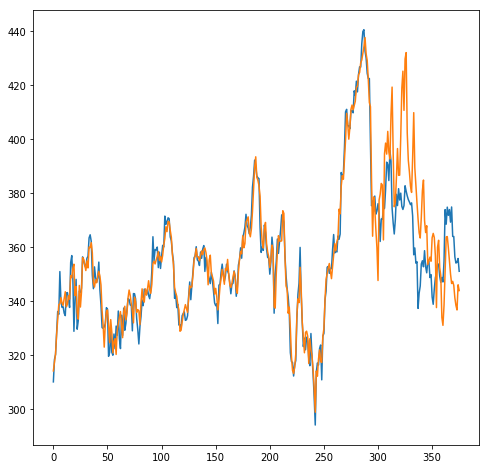

In [31]:
# Bagging NuSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
 
#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = BaggingRegressor(NuSVR(nu = 0.75, kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000))
reg.fit(x_train, np.ravel(y_train))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.85
0.5394736842105263


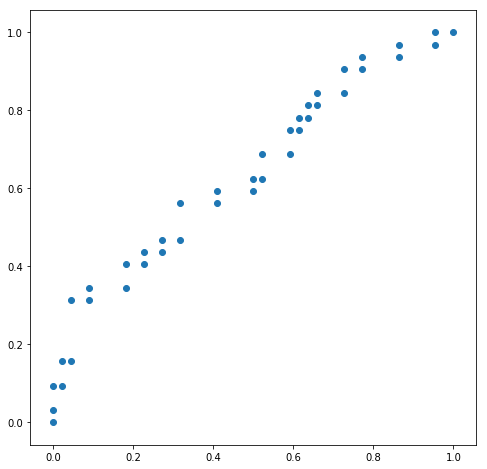

In [32]:
# Bagging NuSVC

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve
 
#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = BaggingClassifier(NuSVC(nu = 0.3, kernel='rbf', max_iter=-1, gamma= 0.001, probability = True))
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.9878331584830686
0.1866773302707658


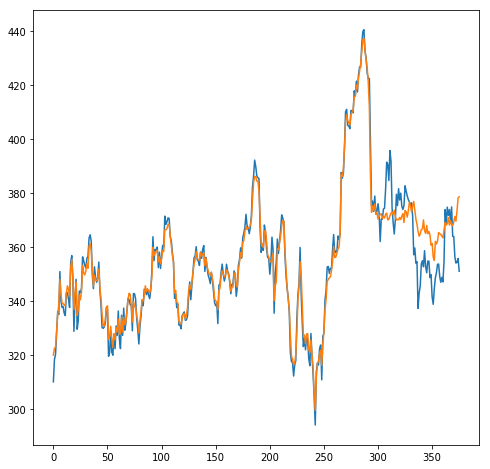

In [34]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = RandomForestRegressor(n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
0.5394736842105263


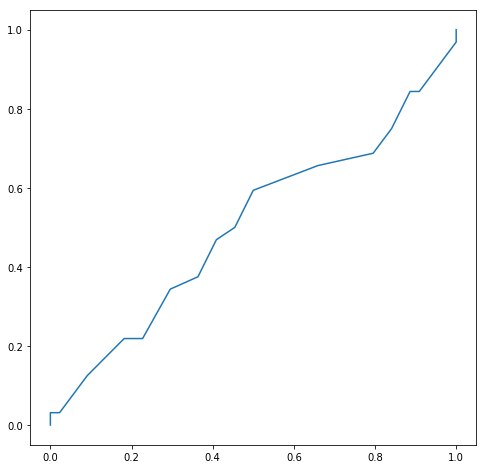

In [35]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = RandomForestClassifier(n_estimators = 75)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

1.0
0.20001918780936945


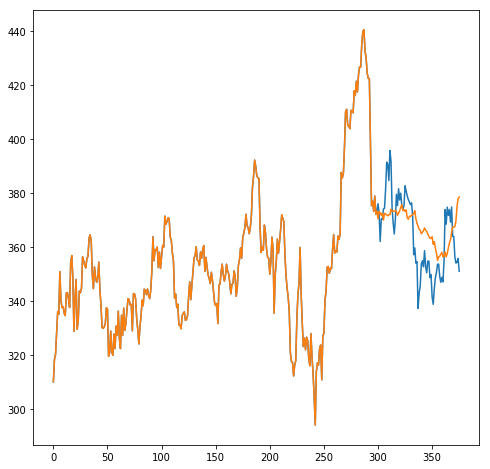

In [36]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = ExtraTreesRegressor(n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
0.5526315789473685


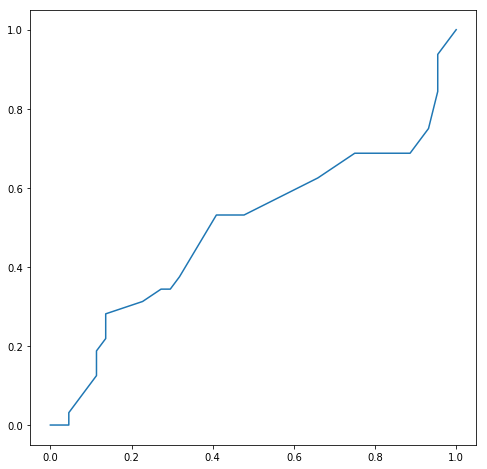

In [37]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = ExtraTreesClassifier(n_estimators = 100)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

0.9904350580827287
0.2008103792390249


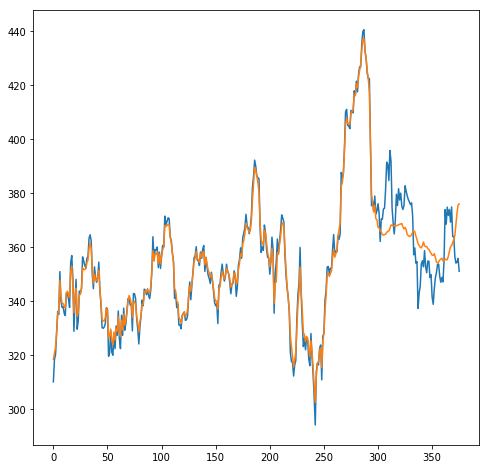

In [38]:
# Bagging Extreme Random Trees
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = BaggingRegressor(ExtraTreesRegressor(n_estimators = 100), n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

In [152]:
# AdaBoost regressor NuSVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)
x_val = x_train[range(int(0.8*len(x_train)), len(x_train))]
x_train = x_train[range(int(0.8*len(x_train)))]
y_val = y_train[range(int(0.8*len(y_train)), len(y_train))]
y_train = y_train[range(int(0.8*len(y_train)))]

arr = np.empty((108, 5))
counter = 0

for n_est in [25, 50, 75, 100]:
    print(n_est)
    for c_val in [100, 1000, 10000]:
        for gamma_val in [0.0001, 0.001, 0.01]:
            for nu_val in [0.25, 0.5, 0.75]:
                reg = AdaBoostRegressor(NuSVR(nu = nu_val, kernel='rbf', max_iter=-1, gamma= gamma_val, C = c_val), 
                                        n_estimators = n_est)
                reg.fit(x_train, np.ravel(y_train))
                preds = reg.predict(x_val)
                mean = np.mean([explained_variance_score(y_val, preds), r2_score(y_val, preds)])
                arr[counter,:] = np.array([n_est, c_val, gamma_val, nu_val, mean])
                counter = counter+1

idx = np.where(arr[:,4] == np.max(arr[:,4]))

25
50
75
100


In [186]:
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)


print(arr[idx])
reg = AdaBoostRegressor(NuSVR(nu = arr[idx,3][0][0], kernel='rbf', max_iter=-1, gamma= arr[idx,2][0][0], C = arr[idx,1][0][0]),
    n_estimators = int(arr[idx,0][0][0]))
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

[[80.          0.57609016]]


IndexError: index 3 is out of bounds for axis 1 with size 2

1.0
0.5657894736842105


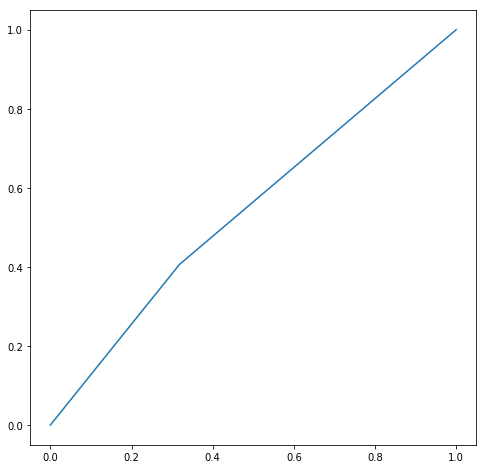

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = AdaBoostClassifier(tree.DecisionTreeClassifier(),
                         n_estimators = 500)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

0.9999999876828181
0.019048578026141683


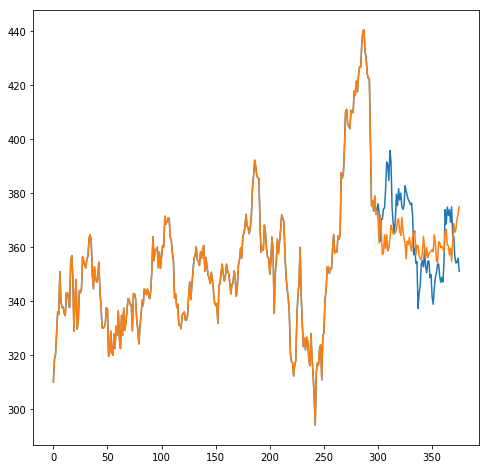

In [32]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = GradientBoostingRegressor(n_estimators = 1000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.9990323964403621
-84.0696234417857


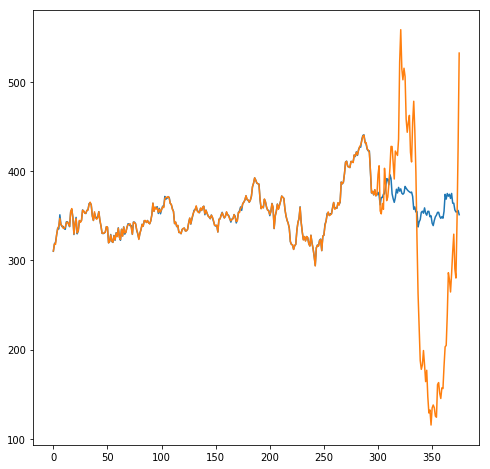

In [33]:
# Neural Network Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = MLPRegressor(hidden_layer_sizes = (100,), activation = 'relu', 
                  solver = 'adam', alpha = 0.0001, batch_size = 'auto',
                  learning_rate = 'constant', max_iter = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.5533333333333333
0.40789473684210525


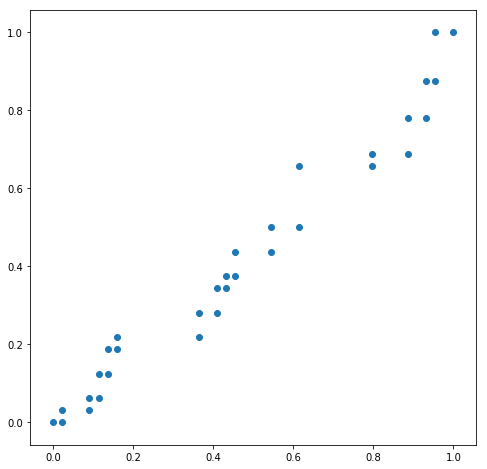

In [34]:
# Neural Network Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', 
                  solver = 'adam', alpha = 0.0001, batch_size = 'auto',
                  learning_rate = 'constant', max_iter = 10000, early_stopping = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

In [189]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution
print(tf.__version__)
from sklearn.metrics import r2_score

1.14.0


Finished training
-3.0129796454010362
-171.0926105554656


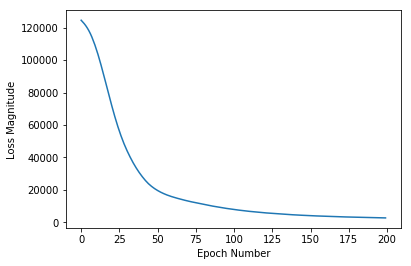

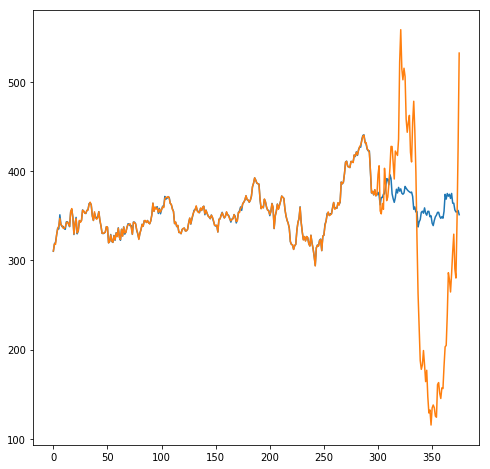

In [36]:
from sklearn.metrics import r2_score

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

# Build basic sequential neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Print training MSE and test MSE, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_test, model.predict(x_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

Finished training
1.0
0.5526315789473685


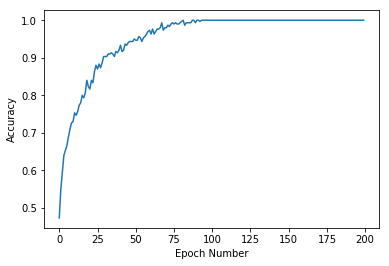

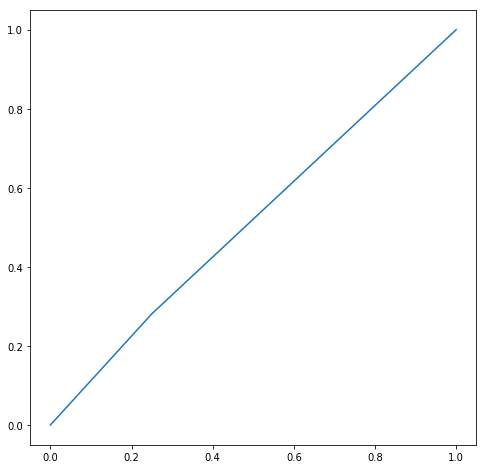

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

# Build basic sequential neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'])

# Print training acc and test acc, plot results
y_train_probs = model.predict(x_train)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Finished training
1.0
0.4605263157894737


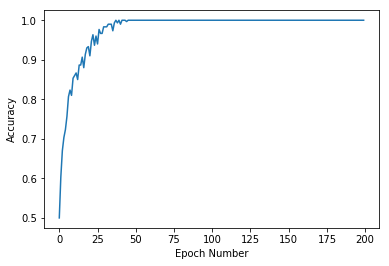

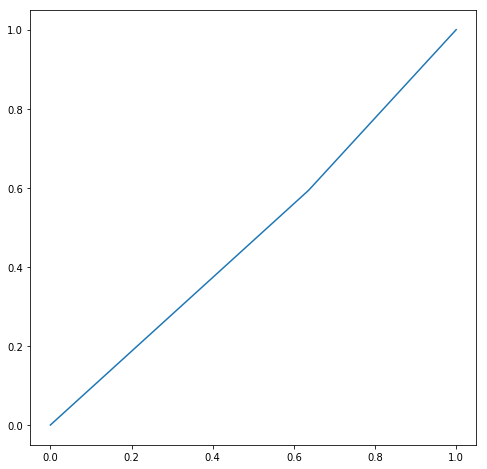

In [38]:
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

# Add a hidden layer to neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'])

# Print training acc and test acc, plot results

y_train_probs = model.predict(x_train)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Finished training
1.0
0.5555555555555556
0.6


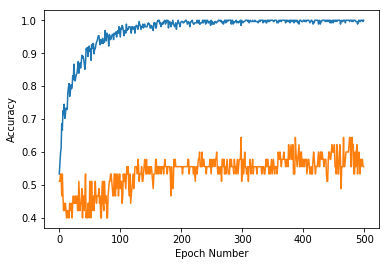

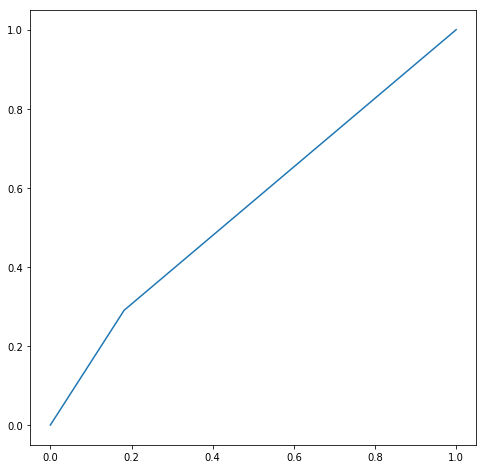

In [39]:
x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

# Our model is over-fitting, add a validation set and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(units=2, activation = 'softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    validation_data = (x_val, y_val),
                    epochs = 500, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')

# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Train on 255 samples, validate on 45 samples
Epoch 1/2000
255/255 [==============================] - 1s 2ms/sample - loss: 123252.8210 - val_loss: 120162.6448
Epoch 2/2000
255/255 [==============================] - 0s 153us/sample - loss: 118186.4077 - val_loss: 115185.9120
Epoch 3/2000
255/255 [==============================] - 0s 176us/sample - loss: 111691.0784 - val_loss: 108964.8880
Epoch 4/2000
255/255 [==============================] - 0s 153us/sample - loss: 103896.2076 - val_loss: 101338.1832
Epoch 5/2000
255/255 [==============================] - 0s 192us/sample - loss: 94101.1122 - val_loss: 92177.1580
Epoch 6/2000
255/255 [==============================] - 0s 184us/sample - loss: 82799.6420 - val_loss: 81460.8356
Epoch 7/2000
255/255 [==============================] - 0s 180us/sample - loss: 70821.9958 - val_loss: 69452.1755
Epoch 8/2000
255/255 [==============================] - 0s 334us/sample - loss: 57791.6117 - val_loss: 56707.0958
Epoch 9/2000
255/255 [===============

255/255 [==============================] - 0s 184us/sample - loss: 1548.7575 - val_loss: 1893.8525
Epoch 145/2000
255/255 [==============================] - 0s 199us/sample - loss: 1642.3524 - val_loss: 1920.2188
Epoch 146/2000
255/255 [==============================] - 0s 201us/sample - loss: 1528.6753 - val_loss: 1981.9346
Epoch 147/2000
255/255 [==============================] - 0s 176us/sample - loss: 1706.3820 - val_loss: 1985.7370
Epoch 148/2000
255/255 [==============================] - 0s 215us/sample - loss: 1572.3579 - val_loss: 1861.7957
Epoch 149/2000
255/255 [==============================] - 0s 219us/sample - loss: 1577.8113 - val_loss: 1993.5088
Epoch 150/2000
255/255 [==============================] - 0s 180us/sample - loss: 1833.1838 - val_loss: 2061.9610
Epoch 151/2000
255/255 [==============================] - 0s 168us/sample - loss: 1514.4066 - val_loss: 1902.4862
Epoch 152/2000
255/255 [==============================] - 0s 172us/sample - loss: 1563.7847 - val_loss:

Epoch 216/2000
255/255 [==============================] - 0s 207us/sample - loss: 1427.2418 - val_loss: 1180.4701
Epoch 217/2000
255/255 [==============================] - 0s 169us/sample - loss: 1145.8141 - val_loss: 1218.5987
Epoch 218/2000
255/255 [==============================] - 0s 156us/sample - loss: 1413.9056 - val_loss: 1334.2073
Epoch 219/2000
255/255 [==============================] - 0s 225us/sample - loss: 1156.4510 - val_loss: 1541.4589
Epoch 220/2000
255/255 [==============================] - 0s 151us/sample - loss: 1334.6941 - val_loss: 1121.5164
Epoch 221/2000
255/255 [==============================] - 0s 155us/sample - loss: 1548.7193 - val_loss: 847.0679
Epoch 222/2000
255/255 [==============================] - 0s 149us/sample - loss: 1568.8927 - val_loss: 975.4814
Epoch 223/2000
255/255 [==============================] - 0s 168us/sample - loss: 1172.2545 - val_loss: 1165.2899
Epoch 224/2000
255/255 [==============================] - 0s 153us/sample - loss: 1528.656

255/255 [==============================] - 0s 173us/sample - loss: 1265.9469 - val_loss: 523.5654
Epoch 361/2000
255/255 [==============================] - 0s 184us/sample - loss: 1180.3330 - val_loss: 549.0517
Epoch 362/2000
255/255 [==============================] - 0s 195us/sample - loss: 1387.0657 - val_loss: 674.9633
Epoch 363/2000
255/255 [==============================] - 0s 215us/sample - loss: 1096.5956 - val_loss: 743.3896
Epoch 364/2000
255/255 [==============================] - 0s 184us/sample - loss: 1150.6312 - val_loss: 562.4775
Epoch 365/2000
255/255 [==============================] - 0s 184us/sample - loss: 1133.4231 - val_loss: 541.4629
Epoch 366/2000
255/255 [==============================] - 0s 149us/sample - loss: 1055.4022 - val_loss: 689.6397
Epoch 367/2000
255/255 [==============================] - 0s 153us/sample - loss: 1207.2381 - val_loss: 627.9105
Epoch 368/2000
255/255 [==============================] - 0s 168us/sample - loss: 1121.4061 - val_loss: 583.138

255/255 [==============================] - 0s 244us/sample - loss: 1042.3989 - val_loss: 429.1498
Epoch 505/2000
255/255 [==============================] - 0s 274us/sample - loss: 1009.4156 - val_loss: 349.2716
Epoch 506/2000
255/255 [==============================] - 0s 184us/sample - loss: 933.3300 - val_loss: 381.8336
Epoch 507/2000
255/255 [==============================] - 0s 272us/sample - loss: 939.3651 - val_loss: 387.7863
Epoch 508/2000
255/255 [==============================] - 0s 176us/sample - loss: 1186.5875 - val_loss: 345.2890
Epoch 509/2000
255/255 [==============================] - 0s 391us/sample - loss: 1174.8325 - val_loss: 439.9646
Epoch 510/2000
255/255 [==============================] - 0s 203us/sample - loss: 957.0971 - val_loss: 522.7036
Epoch 511/2000
255/255 [==============================] - 0s 246us/sample - loss: 1235.1111 - val_loss: 445.9026
Epoch 512/2000
255/255 [==============================] - 0s 243us/sample - loss: 1002.4287 - val_loss: 296.9006
E

Epoch 577/2000
255/255 [==============================] - 0s 168us/sample - loss: 1255.9281 - val_loss: 522.0822
Epoch 578/2000
255/255 [==============================] - 0s 168us/sample - loss: 1260.6750 - val_loss: 346.2430
Epoch 579/2000
255/255 [==============================] - 0s 188us/sample - loss: 1036.1281 - val_loss: 363.9977
Epoch 580/2000
255/255 [==============================] - 0s 199us/sample - loss: 1160.1655 - val_loss: 361.5561
Epoch 581/2000
255/255 [==============================] - 0s 181us/sample - loss: 1111.5220 - val_loss: 506.2693
Epoch 582/2000
255/255 [==============================] - 0s 153us/sample - loss: 1101.7392 - val_loss: 452.2933
Epoch 583/2000
255/255 [==============================] - 0s 196us/sample - loss: 1049.5995 - val_loss: 471.5302
Epoch 584/2000
255/255 [==============================] - 0s 221us/sample - loss: 1083.9648 - val_loss: 396.7459
Epoch 585/2000
255/255 [==============================] - 0s 203us/sample - loss: 1053.3748 - va

Epoch 722/2000
255/255 [==============================] - 0s 184us/sample - loss: 1208.3876 - val_loss: 441.6953
Epoch 723/2000
255/255 [==============================] - 0s 168us/sample - loss: 1267.3368 - val_loss: 365.4627
Epoch 724/2000
255/255 [==============================] - 0s 196us/sample - loss: 1026.5822 - val_loss: 360.7520
Epoch 725/2000
255/255 [==============================] - 0s 184us/sample - loss: 1162.3762 - val_loss: 493.1818
Epoch 726/2000
255/255 [==============================] - 0s 147us/sample - loss: 1038.5848 - val_loss: 375.1761
Epoch 727/2000
255/255 [==============================] - 0s 156us/sample - loss: 1029.0307 - val_loss: 298.0308
Epoch 728/2000
255/255 [==============================] - 0s 149us/sample - loss: 996.8872 - val_loss: 582.0968
Epoch 729/2000
255/255 [==============================] - 0s 166us/sample - loss: 1149.2206 - val_loss: 444.8237
Epoch 730/2000
255/255 [==============================] - 0s 176us/sample - loss: 1020.7102 - val

255/255 [==============================] - 0s 172us/sample - loss: 1134.9778 - val_loss: 416.4769
Epoch 867/2000
255/255 [==============================] - 0s 156us/sample - loss: 1203.0038 - val_loss: 357.3835
Epoch 868/2000
255/255 [==============================] - 0s 270us/sample - loss: 1253.1234 - val_loss: 398.8201
Epoch 869/2000
255/255 [==============================] - 0s 172us/sample - loss: 1098.9226 - val_loss: 475.4183
Epoch 870/2000
255/255 [==============================] - 0s 227us/sample - loss: 930.7001 - val_loss: 250.0271
Epoch 871/2000
255/255 [==============================] - 0s 160us/sample - loss: 1001.9282 - val_loss: 367.5355
Epoch 872/2000
255/255 [==============================] - 0s 192us/sample - loss: 1051.1759 - val_loss: 271.2955
Epoch 873/2000
255/255 [==============================] - 0s 176us/sample - loss: 986.3733 - val_loss: 368.2873
Epoch 874/2000
255/255 [==============================] - 0s 160us/sample - loss: 943.0176 - val_loss: 366.2455
E

Epoch 939/2000
255/255 [==============================] - 0s 172us/sample - loss: 1024.4161 - val_loss: 389.1369
Epoch 940/2000
255/255 [==============================] - 0s 160us/sample - loss: 1080.0550 - val_loss: 278.1104
Epoch 941/2000
255/255 [==============================] - 0s 176us/sample - loss: 921.4903 - val_loss: 364.7732
Epoch 942/2000
255/255 [==============================] - 0s 168us/sample - loss: 932.4744 - val_loss: 403.3982
Epoch 943/2000
255/255 [==============================] - 0s 196us/sample - loss: 936.5381 - val_loss: 462.8433
Epoch 944/2000
255/255 [==============================] - 0s 168us/sample - loss: 1301.6973 - val_loss: 301.1340
Epoch 945/2000
255/255 [==============================] - 0s 184us/sample - loss: 897.5461 - val_loss: 347.0018
Epoch 946/2000
255/255 [==============================] - 0s 184us/sample - loss: 1141.7869 - val_loss: 264.5919
Epoch 947/2000
255/255 [==============================] - 0s 172us/sample - loss: 969.8289 - val_los

255/255 [==============================] - 0s 196us/sample - loss: 967.2860 - val_loss: 349.0703
Epoch 1084/2000
255/255 [==============================] - 0s 196us/sample - loss: 1089.5290 - val_loss: 266.0918
Epoch 1085/2000
255/255 [==============================] - 0s 199us/sample - loss: 946.9886 - val_loss: 320.6531
Epoch 1086/2000
255/255 [==============================] - 0s 180us/sample - loss: 1008.8468 - val_loss: 417.4485
Epoch 1087/2000
255/255 [==============================] - 0s 239us/sample - loss: 1050.8052 - val_loss: 307.2275
Epoch 1088/2000
255/255 [==============================] - 0s 203us/sample - loss: 1078.8948 - val_loss: 279.0868
Epoch 1089/2000
255/255 [==============================] - 0s 246us/sample - loss: 1085.5347 - val_loss: 400.0919
Epoch 1090/2000
255/255 [==============================] - 0s 215us/sample - loss: 1029.1611 - val_loss: 348.5253
Epoch 1091/2000
255/255 [==============================] - 0s 199us/sample - loss: 1149.4782 - val_loss: 2

255/255 [==============================] - 0s 192us/sample - loss: 1140.5582 - val_loss: 217.3834
Epoch 1228/2000
255/255 [==============================] - 0s 195us/sample - loss: 1087.9184 - val_loss: 465.9155
Epoch 1229/2000
255/255 [==============================] - 0s 223us/sample - loss: 905.1916 - val_loss: 318.6330
Epoch 1230/2000
255/255 [==============================] - 0s 180us/sample - loss: 1088.2733 - val_loss: 240.8213
Epoch 1231/2000
255/255 [==============================] - 0s 168us/sample - loss: 1002.8873 - val_loss: 378.5833
Epoch 1232/2000
255/255 [==============================] - 0s 172us/sample - loss: 1159.4996 - val_loss: 322.6229
Epoch 1233/2000
255/255 [==============================] - 0s 199us/sample - loss: 963.2451 - val_loss: 266.9501
Epoch 1234/2000
255/255 [==============================] - 0s 213us/sample - loss: 1186.4692 - val_loss: 290.9269
Epoch 1235/2000
255/255 [==============================] - 0s 176us/sample - loss: 1077.4503 - val_loss: 2

255/255 [==============================] - 0s 200us/sample - loss: 1054.4286 - val_loss: 182.2834
Epoch 1372/2000
255/255 [==============================] - 0s 176us/sample - loss: 949.5114 - val_loss: 219.1560
Epoch 1373/2000
255/255 [==============================] - 0s 196us/sample - loss: 1031.6704 - val_loss: 264.4684
Epoch 1374/2000
255/255 [==============================] - 0s 192us/sample - loss: 952.3732 - val_loss: 239.8101
Epoch 1375/2000
255/255 [==============================] - 0s 162us/sample - loss: 996.5841 - val_loss: 270.9568
Epoch 1376/2000
255/255 [==============================] - 0s 180us/sample - loss: 1111.3079 - val_loss: 182.7562
Epoch 1377/2000
255/255 [==============================] - 0s 199us/sample - loss: 1054.7152 - val_loss: 324.7023
Epoch 1378/2000
255/255 [==============================] - 0s 188us/sample - loss: 1070.3230 - val_loss: 198.3355
Epoch 1379/2000
255/255 [==============================] - 0s 180us/sample - loss: 1073.6753 - val_loss: 19

Epoch 1443/2000
255/255 [==============================] - 0s 207us/sample - loss: 1052.6586 - val_loss: 385.3597
Epoch 1444/2000
255/255 [==============================] - 0s 180us/sample - loss: 992.6009 - val_loss: 261.8778
Epoch 1445/2000
255/255 [==============================] - 0s 180us/sample - loss: 910.7480 - val_loss: 204.5148
Epoch 1446/2000
255/255 [==============================] - 0s 172us/sample - loss: 1027.5889 - val_loss: 353.2102
Epoch 1447/2000
255/255 [==============================] - 0s 141us/sample - loss: 1080.7168 - val_loss: 357.1752
Epoch 1448/2000
255/255 [==============================] - 0s 180us/sample - loss: 1124.4352 - val_loss: 273.6289
Epoch 1449/2000
255/255 [==============================] - 0s 199us/sample - loss: 1000.0739 - val_loss: 247.8490
Epoch 1450/2000
255/255 [==============================] - 0s 180us/sample - loss: 1022.3189 - val_loss: 257.5402
Epoch 1451/2000
255/255 [==============================] - 0s 172us/sample - loss: 973.415

255/255 [==============================] - 0s 172us/sample - loss: 964.8174 - val_loss: 253.1849
Epoch 1516/2000
255/255 [==============================] - 0s 164us/sample - loss: 1068.6479 - val_loss: 207.3018
Epoch 1517/2000
255/255 [==============================] - 0s 196us/sample - loss: 1168.4627 - val_loss: 421.6075
Epoch 1518/2000
255/255 [==============================] - 0s 192us/sample - loss: 1052.1802 - val_loss: 248.1227
Epoch 1519/2000
255/255 [==============================] - 0s 153us/sample - loss: 1324.0194 - val_loss: 192.7603
Epoch 1520/2000
255/255 [==============================] - 0s 149us/sample - loss: 1112.3593 - val_loss: 389.2800
Epoch 1521/2000
255/255 [==============================] - 0s 172us/sample - loss: 983.6134 - val_loss: 243.1055
Epoch 1522/2000
255/255 [==============================] - 0s 149us/sample - loss: 1097.6791 - val_loss: 269.4120
Epoch 1523/2000
255/255 [==============================] - 0s 180us/sample - loss: 1246.0425 - val_loss: 2

Epoch 1659/2000
255/255 [==============================] - 0s 156us/sample - loss: 1027.6872 - val_loss: 178.7909
Epoch 1660/2000
255/255 [==============================] - 0s 188us/sample - loss: 1219.1888 - val_loss: 183.7192
Epoch 1661/2000
255/255 [==============================] - 0s 207us/sample - loss: 996.7205 - val_loss: 283.4081
Epoch 1662/2000
255/255 [==============================] - 0s 199us/sample - loss: 1031.4196 - val_loss: 219.2368
Epoch 1663/2000
255/255 [==============================] - 0s 196us/sample - loss: 969.3360 - val_loss: 304.1773
Epoch 1664/2000
255/255 [==============================] - 0s 223us/sample - loss: 1012.1046 - val_loss: 343.7981
Epoch 1665/2000
255/255 [==============================] - 0s 199us/sample - loss: 1192.9896 - val_loss: 377.1222
Epoch 1666/2000
255/255 [==============================] - 0s 176us/sample - loss: 930.5753 - val_loss: 279.5312
Epoch 1667/2000
255/255 [==============================] - 0s 176us/sample - loss: 1006.773

255/255 [==============================] - 0s 167us/sample - loss: 1052.3394 - val_loss: 377.2020
Epoch 1732/2000
255/255 [==============================] - 0s 172us/sample - loss: 968.9857 - val_loss: 190.3667
Epoch 1733/2000
255/255 [==============================] - 0s 188us/sample - loss: 1006.8746 - val_loss: 343.3583
Epoch 1734/2000
255/255 [==============================] - 0s 172us/sample - loss: 960.7340 - val_loss: 292.6523
Epoch 1735/2000
255/255 [==============================] - 0s 153us/sample - loss: 993.1852 - val_loss: 227.6151
Epoch 1736/2000
255/255 [==============================] - 0s 188us/sample - loss: 871.4868 - val_loss: 296.5072
Epoch 1737/2000
255/255 [==============================] - 0s 156us/sample - loss: 954.6102 - val_loss: 196.7707
Epoch 1738/2000
255/255 [==============================] - 0s 156us/sample - loss: 978.9130 - val_loss: 330.2534
Epoch 1739/2000
255/255 [==============================] - 0s 156us/sample - loss: 984.9434 - val_loss: 238.37

255/255 [==============================] - 0s 178us/sample - loss: 1134.2067 - val_loss: 279.7412
Epoch 1876/2000
255/255 [==============================] - 0s 172us/sample - loss: 1023.6632 - val_loss: 234.9190
Epoch 1877/2000
255/255 [==============================] - 0s 196us/sample - loss: 1296.9680 - val_loss: 195.9825
Epoch 1878/2000
255/255 [==============================] - 0s 196us/sample - loss: 989.9293 - val_loss: 265.0158
Epoch 1879/2000
255/255 [==============================] - 0s 196us/sample - loss: 1056.7206 - val_loss: 366.8459
Epoch 1880/2000
255/255 [==============================] - 0s 207us/sample - loss: 1039.4992 - val_loss: 212.5828
Epoch 1881/2000
255/255 [==============================] - 0s 172us/sample - loss: 1080.9605 - val_loss: 239.1702
Epoch 1882/2000
255/255 [==============================] - 0s 180us/sample - loss: 1166.6319 - val_loss: 260.3384
Epoch 1883/2000
255/255 [==============================] - 0s 176us/sample - loss: 974.1229 - val_loss: 2

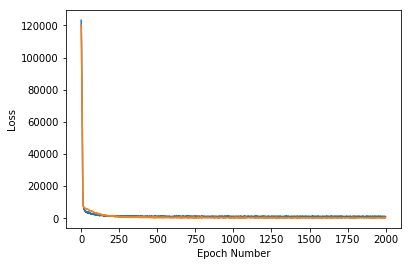

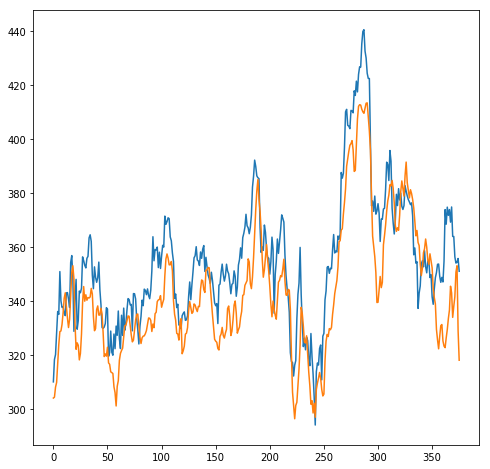

In [40]:
# CNN Regression

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_close, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

# Our model is struggling, let's try a CNN
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(87, 1), stddev = 0.5),
    tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation = 'relu', padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 88, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 1)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size = 32, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 2000)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
# Print training acc, validation acc, and test acc, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_val, model.predict(x_val)))
print(r2_score(y_test, model.predict(x_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), model.predict(x))

Finished training
1.0
0.5111111111111111
0.6133333333333333


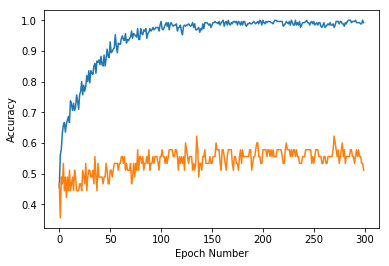

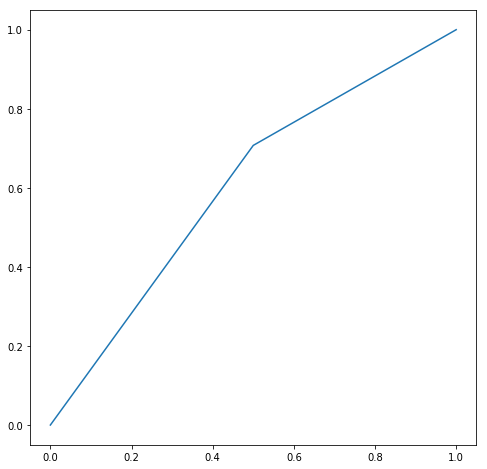

In [75]:
# CNN Classifier
x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

# Our model is struggling, let's try a CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation = 'relu',
                          input_shape=(87, 1), padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 88, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 2, activation = 'softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, 
                    validation_data = (x_val, y_val),
                    epochs = 300, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')

# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

In [190]:
# LSTM Regression

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_close, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

#print(np.mean(x_train, axis=0))

# Try an LSTM neural network with pooling
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(87, 1), stddev = 0.5),
    tf.keras.layers.LSTM(units=75, return_sequences=False, dropout=0.25, recurrent_dropout=0.25),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mean_squared_error')
# Train the model
history = model.fit(x_train, y_train, batch_size = 64, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 5000)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
# Print training acc, validation acc, and test acc, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_val, model.predict(x_val)))
print(r2_score(y_test, model.predict(x_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), model.predict(x))

Train on 255 samples, validate on 45 samples
Epoch 1/5000
255/255 [==============================] - 1s 6ms/sample - loss: 1264393.6824 - val_loss: 1253953.1250
Epoch 2/5000
255/255 [==============================] - 0s 2ms/sample - loss: 1264226.2377 - val_loss: 1253779.8750
Epoch 3/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1263992.1951 - val_loss: 1253467.5000
Epoch 4/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1263436.0255 - val_loss: 1252497.2500
Epoch 5/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1261793.3407 - val_loss: 1248581.5000
Epoch 6/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1257914.5647 - val_loss: 1243741.6250
Epoch 7/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1253723.3466 - val_loss: 1241411.0000
Epoch 8/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1250925.5314 - val_loss: 1239065.7500
Epoch 9/5000
255/255 [=====

255/255 [==============================] - 1s 2ms/sample - loss: 1195599.3196 - val_loss: 1185154.8750
Epoch 71/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1194934.6343 - val_loss: 1184495.8750
Epoch 72/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1194275.3368 - val_loss: 1183837.3750
Epoch 73/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1193611.3221 - val_loss: 1183180.1250
Epoch 74/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1192951.8583 - val_loss: 1182524.1250
Epoch 75/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1192292.8382 - val_loss: 1181868.7500
Epoch 76/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1191637.9201 - val_loss: 1181214.3750
Epoch 77/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1190977.6098 - val_loss: 1180560.8750
Epoch 78/5000
255/255 [==============================] - 1s 3ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 1151436.8417 - val_loss: 1141231.5000
Epoch 140/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1150814.9353 - val_loss: 1140612.0000
Epoch 141/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1150194.5167 - val_loss: 1139992.5000
Epoch 142/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1149571.6260 - val_loss: 1139373.7500
Epoch 143/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1148950.4721 - val_loss: 1138755.3750
Epoch 144/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1148329.1779 - val_loss: 1138137.3750
Epoch 145/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1147707.4863 - val_loss: 1137519.8750
Epoch 146/5000
255/255 [==============================] - 0s 2ms/sample - loss: 1147086.1539 - val_loss: 1136902.8750
Epoch 147/5000
255/255 [==============================] - 0s 2ms/sample

255/255 [==============================] - 1s 2ms/sample - loss: 1109294.7706 - val_loss: 1099293.5000
Epoch 209/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1108697.6711 - val_loss: 1098696.7500
Epoch 210/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1108082.8505 - val_loss: 1098100.1250
Epoch 211/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1107483.0828 - val_loss: 1097503.7500
Epoch 212/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1106883.4363 - val_loss: 1096907.7500
Epoch 213/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1106284.8657 - val_loss: 1096311.7500
Epoch 214/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1105686.0333 - val_loss: 1095716.1250
Epoch 215/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1105086.7382 - val_loss: 1095121.1250
Epoch 216/5000
255/255 [==============================] - 1s 2ms/sample

255/255 [==============================] - 1s 2ms/sample - loss: 1068510.5799 - val_loss: 1058736.1250
Epoch 278/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1067929.5078 - val_loss: 1058157.1250
Epoch 279/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1067348.2377 - val_loss: 1057578.1250
Epoch 280/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1066765.8662 - val_loss: 1056999.8750
Epoch 281/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1066185.2667 - val_loss: 1056421.6250
Epoch 282/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1065604.4110 - val_loss: 1055843.5000
Epoch 283/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1065024.7539 - val_loss: 1055265.7500
Epoch 284/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1064442.2559 - val_loss: 1054688.5000
Epoch 285/5000
255/255 [==============================] - 1s 2ms/sample

255/255 [==============================] - 0s 2ms/sample - loss: 1028914.5218 - val_loss: 1019349.2500
Epoch 347/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1028349.6105 - val_loss: 1018786.3125
Epoch 348/5000
255/255 [==============================] - 0s 2ms/sample - loss: 1027784.0306 - val_loss: 1018223.6250
Epoch 349/5000
255/255 [==============================] - 0s 2ms/sample - loss: 1027221.7637 - val_loss: 1017661.3125
Epoch 350/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1026653.1186 - val_loss: 1017099.1875
Epoch 351/5000
255/255 [==============================] - 1s 3ms/sample - loss: 1026089.1203 - val_loss: 1016537.2500
Epoch 352/5000
255/255 [==============================] - 1s 2ms/sample - loss: 1025523.7488 - val_loss: 1015975.5625
Epoch 353/5000
255/255 [==============================] - 0s 2ms/sample - loss: 1024959.5446 - val_loss: 1015413.9375
Epoch 354/5000
255/255 [==============================] - 0s 2ms/sample

255/255 [==============================] - 1s 2ms/sample - loss: 989834.3542 - val_loss: 980477.4375
Epoch 417/5000
255/255 [==============================] - 1s 2ms/sample - loss: 989283.0279 - val_loss: 979929.4375
Epoch 418/5000
255/255 [==============================] - 1s 2ms/sample - loss: 988732.1850 - val_loss: 979382.0625
Epoch 419/5000
255/255 [==============================] - 1s 2ms/sample - loss: 988181.8353 - val_loss: 978834.6875
Epoch 420/5000
255/255 [==============================] - 1s 2ms/sample - loss: 987632.7880 - val_loss: 978287.1250
Epoch 421/5000
255/255 [==============================] - 1s 2ms/sample - loss: 987082.5211 - val_loss: 977740.0625
Epoch 422/5000
255/255 [==============================] - 1s 2ms/sample - loss: 986531.1417 - val_loss: 977193.6875
Epoch 423/5000
255/255 [==============================] - 1s 2ms/sample - loss: 985982.8213 - val_loss: 976647.1875
Epoch 424/5000
255/255 [==============================] - 1s 2ms/sample - loss: 985433.

Epoch 487/5000
255/255 [==============================] - 1s 2ms/sample - loss: 951237.1326 - val_loss: 942091.0000
Epoch 488/5000
255/255 [==============================] - 1s 3ms/sample - loss: 950699.1632 - val_loss: 941558.2500
Epoch 489/5000
255/255 [==============================] - 0s 2ms/sample - loss: 950164.5645 - val_loss: 941024.8125
Epoch 490/5000
255/255 [==============================] - 1s 2ms/sample - loss: 949628.2904 - val_loss: 940491.7500
Epoch 491/5000
255/255 [==============================] - 1s 3ms/sample - loss: 949093.5875 - val_loss: 939958.3125
Epoch 492/5000
255/255 [==============================] - 1s 3ms/sample - loss: 948555.9179 - val_loss: 939425.9375
Epoch 493/5000
255/255 [==============================] - 1s 2ms/sample - loss: 948021.6054 - val_loss: 938893.2500
Epoch 494/5000
255/255 [==============================] - 1s 2ms/sample - loss: 947486.5650 - val_loss: 938360.8750
Epoch 495/5000
255/255 [==============================] - 1s 3ms/sample 

255/255 [==============================] - 1s 2ms/sample - loss: 914156.8103 - val_loss: 905218.5000
Epoch 558/5000
255/255 [==============================] - 1s 2ms/sample - loss: 913634.5681 - val_loss: 904698.5000
Epoch 559/5000
255/255 [==============================] - 0s 2ms/sample - loss: 913112.1314 - val_loss: 904178.7500
Epoch 560/5000
255/255 [==============================] - 1s 2ms/sample - loss: 912588.9186 - val_loss: 903659.3125
Epoch 561/5000
255/255 [==============================] - 0s 2ms/sample - loss: 912066.5547 - val_loss: 903140.0000
Epoch 562/5000
255/255 [==============================] - 1s 2ms/sample - loss: 911545.1096 - val_loss: 902620.6875
Epoch 563/5000
255/255 [==============================] - 1s 2ms/sample - loss: 911023.7500 - val_loss: 902101.2500
Epoch 564/5000
255/255 [==============================] - 1s 2ms/sample - loss: 910501.1436 - val_loss: 901582.3750
Epoch 565/5000
255/255 [==============================] - 1s 2ms/sample - loss: 909979.

Epoch 628/5000
255/255 [==============================] - 0s 2ms/sample - loss: 877494.3983 - val_loss: 868762.5000
Epoch 629/5000
255/255 [==============================] - 0s 2ms/sample - loss: 876984.0792 - val_loss: 868255.8125
Epoch 630/5000
255/255 [==============================] - 1s 2ms/sample - loss: 876474.6873 - val_loss: 867749.4375
Epoch 631/5000
255/255 [==============================] - 0s 2ms/sample - loss: 875965.0978 - val_loss: 867243.1250
Epoch 632/5000
255/255 [==============================] - 1s 2ms/sample - loss: 875456.1797 - val_loss: 866736.8750
Epoch 633/5000
255/255 [==============================] - 0s 2ms/sample - loss: 874947.0203 - val_loss: 866230.8750
Epoch 634/5000
255/255 [==============================] - 1s 2ms/sample - loss: 874439.1213 - val_loss: 865724.6875
Epoch 635/5000
255/255 [==============================] - 1s 2ms/sample - loss: 873929.6711 - val_loss: 865218.9375
Epoch 636/5000
255/255 [==============================] - 1s 2ms/sample 

255/255 [==============================] - 1s 2ms/sample - loss: 842246.3208 - val_loss: 833718.5000
Epoch 699/5000
255/255 [==============================] - 1s 2ms/sample - loss: 841749.3593 - val_loss: 833223.9375
Epoch 700/5000
255/255 [==============================] - 1s 2ms/sample - loss: 841251.2189 - val_loss: 832730.2500
Epoch 701/5000
255/255 [==============================] - 1s 3ms/sample - loss: 840755.0919 - val_loss: 832236.1875
Epoch 702/5000
255/255 [==============================] - 1s 2ms/sample - loss: 840259.1051 - val_loss: 831742.2500
Epoch 703/5000
255/255 [==============================] - 1s 2ms/sample - loss: 839761.7211 - val_loss: 831248.6250
Epoch 704/5000
255/255 [==============================] - 1s 2ms/sample - loss: 839265.7456 - val_loss: 830755.1875
Epoch 705/5000
255/255 [==============================] - 1s 2ms/sample - loss: 838769.5304 - val_loss: 830261.8750
Epoch 706/5000
255/255 [==============================] - 1s 2ms/sample - loss: 838273.

Epoch 769/5000
255/255 [==============================] - 0s 2ms/sample - loss: 807378.9824 - val_loss: 799057.0625
Epoch 770/5000
255/255 [==============================] - 0s 2ms/sample - loss: 806894.4833 - val_loss: 798574.7500
Epoch 771/5000
255/255 [==============================] - 0s 2ms/sample - loss: 806408.5853 - val_loss: 798093.1250
Epoch 772/5000
255/255 [==============================] - ETA: 0s - loss: 804792.14 - 1s 2ms/sample - loss: 805924.6738 - val_loss: 797611.3750
Epoch 773/5000
255/255 [==============================] - 0s 2ms/sample - loss: 805440.2679 - val_loss: 797129.9375
Epoch 774/5000
255/255 [==============================] - 0s 2ms/sample - loss: 804955.8725 - val_loss: 796648.6250
Epoch 775/5000
255/255 [==============================] - 0s 2ms/sample - loss: 804472.6561 - val_loss: 796167.1875
Epoch 776/5000
255/255 [==============================] - 0s 2ms/sample - loss: 803988.3343 - val_loss: 795686.3125
Epoch 777/5000
255/255 [====================

255/255 [==============================] - 0s 2ms/sample - loss: 773850.4887 - val_loss: 765730.3125
Epoch 840/5000
255/255 [==============================] - 0s 2ms/sample - loss: 773378.2975 - val_loss: 765259.9375
Epoch 841/5000
255/255 [==============================] - 0s 2ms/sample - loss: 772904.9529 - val_loss: 764789.9375
Epoch 842/5000
255/255 [==============================] - 0s 2ms/sample - loss: 772431.5213 - val_loss: 764320.5625
Epoch 843/5000
255/255 [==============================] - 1s 2ms/sample - loss: 771959.2613 - val_loss: 763851.0000
Epoch 844/5000
255/255 [==============================] - 0s 2ms/sample - loss: 771488.3591 - val_loss: 763381.3125
Epoch 845/5000
255/255 [==============================] - 0s 2ms/sample - loss: 771014.9358 - val_loss: 762912.2500
Epoch 846/5000
255/255 [==============================] - 1s 2ms/sample - loss: 770542.1419 - val_loss: 762443.6250
Epoch 847/5000
255/255 [==============================] - 0s 2ms/sample - loss: 770071.

Epoch 910/5000
255/255 [==============================] - 0s 2ms/sample - loss: 740684.5735 - val_loss: 732768.3750
Epoch 911/5000
255/255 [==============================] - 0s 2ms/sample - loss: 740223.2912 - val_loss: 732310.3125
Epoch 912/5000
255/255 [==============================] - 1s 2ms/sample - loss: 739762.6257 - val_loss: 731852.2500
Epoch 913/5000
255/255 [==============================] - 0s 2ms/sample - loss: 739302.5120 - val_loss: 731394.1250
Epoch 914/5000
255/255 [==============================] - 0s 2ms/sample - loss: 738842.3846 - val_loss: 730936.0625
Epoch 915/5000
255/255 [==============================] - 1s 2ms/sample - loss: 738380.1618 - val_loss: 730478.6250
Epoch 916/5000
255/255 [==============================] - 0s 2ms/sample - loss: 737919.9576 - val_loss: 730021.5625
Epoch 917/5000
255/255 [==============================] - 1s 2ms/sample - loss: 737460.4571 - val_loss: 729564.1875
Epoch 918/5000
255/255 [==============================] - 1s 2ms/sample 

255/255 [==============================] - 1s 2ms/sample - loss: 708800.1738 - val_loss: 701084.5000
Epoch 981/5000
255/255 [==============================] - 1s 2ms/sample - loss: 708350.5066 - val_loss: 700637.7500
Epoch 982/5000
255/255 [==============================] - 1s 3ms/sample - loss: 707901.5635 - val_loss: 700191.0000
Epoch 983/5000
255/255 [==============================] - 1s 3ms/sample - loss: 707452.4159 - val_loss: 699744.3750
Epoch 984/5000
255/255 [==============================] - 0s 2ms/sample - loss: 707003.0233 - val_loss: 699297.8750
Epoch 985/5000
255/255 [==============================] - 1s 2ms/sample - loss: 706552.9108 - val_loss: 698851.9375
Epoch 986/5000
255/255 [==============================] - 1s 2ms/sample - loss: 706104.8993 - val_loss: 698405.7500
Epoch 987/5000
255/255 [==============================] - 1s 2ms/sample - loss: 705655.5015 - val_loss: 697960.1875
Epoch 988/5000
255/255 [==============================] - 1s 2ms/sample - loss: 705207.

255/255 [==============================] - 1s 2ms/sample - loss: 677711.0500 - val_loss: 670194.8750
Epoch 1051/5000
255/255 [==============================] - 1s 2ms/sample - loss: 677273.3277 - val_loss: 669759.0625
Epoch 1052/5000
255/255 [==============================] - 0s 2ms/sample - loss: 676834.9228 - val_loss: 669323.5625
Epoch 1053/5000
255/255 [==============================] - 0s 2ms/sample - loss: 676396.5735 - val_loss: 668888.2500
Epoch 1054/5000
255/255 [==============================] - 1s 2ms/sample - loss: 675957.6419 - val_loss: 668453.3125
Epoch 1055/5000
255/255 [==============================] - 0s 2ms/sample - loss: 675520.6564 - val_loss: 668018.2500
Epoch 1056/5000
255/255 [==============================] - 1s 2ms/sample - loss: 675083.3132 - val_loss: 667583.3125
Epoch 1057/5000
255/255 [==============================] - 0s 2ms/sample - loss: 674645.1674 - val_loss: 667148.9375
Epoch 1058/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 647405.0439 - val_loss: 640087.6875
Epoch 1121/5000
255/255 [==============================] - 0s 2ms/sample - loss: 646978.1309 - val_loss: 639663.1875
Epoch 1122/5000
255/255 [==============================] - 0s 2ms/sample - loss: 646550.5456 - val_loss: 639238.9375
Epoch 1123/5000
255/255 [==============================] - 0s 2ms/sample - loss: 646123.9549 - val_loss: 638814.9375
Epoch 1124/5000
255/255 [==============================] - 0s 2ms/sample - loss: 645697.4941 - val_loss: 638390.7500
Epoch 1125/5000
255/255 [==============================] - 0s 2ms/sample - loss: 645270.2061 - val_loss: 637967.0000
Epoch 1126/5000
255/255 [==============================] - 1s 2ms/sample - loss: 644843.9370 - val_loss: 637543.1875
Epoch 1127/5000
255/255 [==============================] - 1s 2ms/sample - loss: 644417.1449 - val_loss: 637119.8125
Epoch 1128/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 617874.3699 - val_loss: 610754.8750
Epoch 1191/5000
255/255 [==============================] - 0s 2ms/sample - loss: 617458.3784 - val_loss: 610341.2500
Epoch 1192/5000
255/255 [==============================] - 0s 2ms/sample - loss: 617041.6252 - val_loss: 609928.0000
Epoch 1193/5000
255/255 [==============================] - 0s 2ms/sample - loss: 616625.4458 - val_loss: 609514.9375
Epoch 1194/5000
255/255 [==============================] - 0s 2ms/sample - loss: 616209.8287 - val_loss: 609102.0000
Epoch 1195/5000
255/255 [==============================] - 0s 2ms/sample - loss: 615794.8718 - val_loss: 608688.8750
Epoch 1196/5000
255/255 [==============================] - 0s 2ms/sample - loss: 615379.3096 - val_loss: 608275.9375
Epoch 1197/5000
255/255 [==============================] - 0s 2ms/sample - loss: 614962.5007 - val_loss: 607863.6250
Epoch 1198/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 589109.2779 - val_loss: 582188.3125
Epoch 1261/5000
255/255 [==============================] - 0s 2ms/sample - loss: 588704.1873 - val_loss: 581785.8750
Epoch 1262/5000
255/255 [==============================] - 0s 2ms/sample - loss: 588299.2689 - val_loss: 581383.4375
Epoch 1263/5000
255/255 [==============================] - 0s 2ms/sample - loss: 587893.2375 - val_loss: 580981.5000
Epoch 1264/5000
255/255 [==============================] - 0s 2ms/sample - loss: 587489.2498 - val_loss: 580579.3125
Epoch 1265/5000
255/255 [==============================] - 1s 2ms/sample - loss: 587084.4456 - val_loss: 580177.4375
Epoch 1266/5000
255/255 [==============================] - 0s 2ms/sample - loss: 586679.6377 - val_loss: 579775.6250
Epoch 1267/5000
255/255 [==============================] - 0s 2ms/sample - loss: 586275.7213 - val_loss: 579373.9375
Epoch 1268/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 561104.8701 - val_loss: 554381.3125
Epoch 1331/5000
255/255 [==============================] - 0s 2ms/sample - loss: 560710.7419 - val_loss: 553989.5000
Epoch 1332/5000
255/255 [==============================] - 0s 2ms/sample - loss: 560315.7199 - val_loss: 553598.0625
Epoch 1333/5000
255/255 [==============================] - 0s 2ms/sample - loss: 559921.7623 - val_loss: 553206.6875
Epoch 1334/5000
255/255 [==============================] - 0s 2ms/sample - loss: 559528.2206 - val_loss: 552815.2500
Epoch 1335/5000
255/255 [==============================] - 1s 2ms/sample - loss: 559133.2169 - val_loss: 552424.3750
Epoch 1336/5000
255/255 [==============================] - 0s 2ms/sample - loss: 558740.1250 - val_loss: 552033.3125
Epoch 1337/5000
255/255 [==============================] - 0s 2ms/sample - loss: 558346.1419 - val_loss: 551642.5625
Epoch 1338/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 533014.3681 - val_loss: 526481.0000
Epoch 1401/5000
255/255 [==============================] - 1s 2ms/sample - loss: 532611.6625 - val_loss: 526081.3750
Epoch 1402/5000
255/255 [==============================] - 1s 2ms/sample - loss: 532209.2326 - val_loss: 525682.3125
Epoch 1403/5000
255/255 [==============================] - 1s 2ms/sample - loss: 531806.9225 - val_loss: 525284.0000
Epoch 1404/5000
255/255 [==============================] - 1s 2ms/sample - loss: 531406.7593 - val_loss: 524885.7500
Epoch 1405/5000
255/255 [==============================] - 0s 2ms/sample - loss: 531006.5919 - val_loss: 524487.7500
Epoch 1406/5000
255/255 [==============================] - 1s 2ms/sample - loss: 530604.1395 - val_loss: 524091.0625
Epoch 1407/5000
255/255 [==============================] - 1s 2ms/sample - loss: 530205.7461 - val_loss: 523694.4062
Epoch 1408/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 505650.0940 - val_loss: 499325.5000
Epoch 1471/5000
255/255 [==============================] - 0s 2ms/sample - loss: 505267.5324 - val_loss: 498946.3438
Epoch 1472/5000
255/255 [==============================] - 1s 2ms/sample - loss: 504885.1293 - val_loss: 498567.6562
Epoch 1473/5000
255/255 [==============================] - 0s 2ms/sample - loss: 504504.0640 - val_loss: 498189.2812
Epoch 1474/5000
255/255 [==============================] - 0s 2ms/sample - loss: 504122.9979 - val_loss: 497810.6250
Epoch 1475/5000
255/255 [==============================] - 1s 2ms/sample - loss: 503741.6652 - val_loss: 497432.0312
Epoch 1476/5000
255/255 [==============================] - 1s 2ms/sample - loss: 503361.4288 - val_loss: 497053.5625
Epoch 1477/5000
255/255 [==============================] - 0s 2ms/sample - loss: 502979.1343 - val_loss: 496675.6562
Epoch 1478/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 479371.3022 - val_loss: 473249.1562
Epoch 1541/5000
255/255 [==============================] - 0s 2ms/sample - loss: 479002.8064 - val_loss: 472883.2500
Epoch 1542/5000
255/255 [==============================] - 0s 2ms/sample - loss: 478634.1556 - val_loss: 472517.2500
Epoch 1543/5000
255/255 [==============================] - 0s 2ms/sample - loss: 478265.7763 - val_loss: 472151.4688
Epoch 1544/5000
255/255 [==============================] - 0s 2ms/sample - loss: 477896.6333 - val_loss: 471786.1875
Epoch 1545/5000
255/255 [==============================] - 0s 2ms/sample - loss: 477529.8393 - val_loss: 471420.5312
Epoch 1546/5000
255/255 [==============================] - 0s 2ms/sample - loss: 477161.0243 - val_loss: 471055.4375
Epoch 1547/5000
255/255 [==============================] - 0s 2ms/sample - loss: 476792.6243 - val_loss: 470690.5312
Epoch 1548/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 453962.0309 - val_loss: 448038.7500
Epoch 1611/5000
255/255 [==============================] - 0s 2ms/sample - loss: 453604.6960 - val_loss: 447684.8125
Epoch 1612/5000
255/255 [==============================] - 0s 2ms/sample - loss: 453248.3735 - val_loss: 447330.7500
Epoch 1613/5000
255/255 [==============================] - 0s 2ms/sample - loss: 452892.5559 - val_loss: 446976.4375
Epoch 1614/5000
255/255 [==============================] - 0s 2ms/sample - loss: 452534.6991 - val_loss: 446622.8750
Epoch 1615/5000
255/255 [==============================] - 0s 2ms/sample - loss: 452179.0086 - val_loss: 446269.1875
Epoch 1616/5000
255/255 [==============================] - 0s 2ms/sample - loss: 451821.6706 - val_loss: 445916.1250
Epoch 1617/5000
255/255 [==============================] - 0s 2ms/sample - loss: 451466.1532 - val_loss: 445562.9688
Epoch 1618/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 429364.3988 - val_loss: 423638.5000
Epoch 1681/5000
255/255 [==============================] - 0s 2ms/sample - loss: 429016.9440 - val_loss: 423295.8750
Epoch 1682/5000
255/255 [==============================] - 0s 2ms/sample - loss: 428672.3428 - val_loss: 422953.1562
Epoch 1683/5000
255/255 [==============================] - 0s 2ms/sample - loss: 428327.7186 - val_loss: 422610.2188
Epoch 1684/5000
255/255 [==============================] - 1s 2ms/sample - loss: 427982.1534 - val_loss: 422267.7812
Epoch 1685/5000
255/255 [==============================] - 0s 2ms/sample - loss: 427635.8449 - val_loss: 421925.9688
Epoch 1686/5000
255/255 [==============================] - 0s 2ms/sample - loss: 427291.9013 - val_loss: 421583.8125
Epoch 1687/5000
255/255 [==============================] - 0s 2ms/sample - loss: 426946.8830 - val_loss: 421242.0000
Epoch 1688/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 405549.5145 - val_loss: 400021.7188
Epoch 1751/5000
255/255 [==============================] - 1s 2ms/sample - loss: 405214.8403 - val_loss: 399689.7812
Epoch 1752/5000
255/255 [==============================] - 0s 2ms/sample - loss: 404880.0012 - val_loss: 399358.1250
Epoch 1753/5000
255/255 [==============================] - 0s 2ms/sample - loss: 404545.8768 - val_loss: 399026.5625
Epoch 1754/5000
255/255 [==============================] - 0s 2ms/sample - loss: 404211.9786 - val_loss: 398695.1562
Epoch 1755/5000
255/255 [==============================] - 0s 2ms/sample - loss: 403877.7654 - val_loss: 398363.8750
Epoch 1756/5000
255/255 [==============================] - 0s 2ms/sample - loss: 403543.7089 - val_loss: 398032.8438
Epoch 1757/5000
255/255 [==============================] - 1s 2ms/sample - loss: 403210.2419 - val_loss: 397701.9062
Epoch 1758/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 382503.5373 - val_loss: 377172.6562
Epoch 1821/5000
255/255 [==============================] - 0s 2ms/sample - loss: 382179.4712 - val_loss: 376852.0312
Epoch 1822/5000
255/255 [==============================] - 0s 2ms/sample - loss: 381857.0792 - val_loss: 376531.1562
Epoch 1823/5000
255/255 [==============================] - 0s 2ms/sample - loss: 381533.0038 - val_loss: 376210.5312
Epoch 1824/5000
255/255 [==============================] - 0s 2ms/sample - loss: 381210.0598 - val_loss: 375890.0000
Epoch 1825/5000
255/255 [==============================] - 0s 2ms/sample - loss: 380886.1467 - val_loss: 375570.0312
Epoch 1826/5000
255/255 [==============================] - 0s 2ms/sample - loss: 380563.8881 - val_loss: 375249.8750
Epoch 1827/5000
255/255 [==============================] - 0s 2ms/sample - loss: 380240.9984 - val_loss: 374929.8750
Epoch 1828/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 360217.4174 - val_loss: 355082.4375
Epoch 1891/5000
255/255 [==============================] - 0s 2ms/sample - loss: 359904.0007 - val_loss: 354772.4375
Epoch 1892/5000
255/255 [==============================] - 0s 2ms/sample - loss: 359592.3059 - val_loss: 354462.1250
Epoch 1893/5000
255/255 [==============================] - 0s 2ms/sample - loss: 359278.7414 - val_loss: 354152.3438
Epoch 1894/5000
255/255 [==============================] - 0s 2ms/sample - loss: 358966.0293 - val_loss: 353842.8750
Epoch 1895/5000
255/255 [==============================] - 0s 2ms/sample - loss: 358653.9009 - val_loss: 353533.5625
Epoch 1896/5000
255/255 [==============================] - 1s 2ms/sample - loss: 358342.2325 - val_loss: 353224.0625
Epoch 1897/5000
255/255 [==============================] - 0s 2ms/sample - loss: 358030.7320 - val_loss: 352914.5000
Epoch 1898/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 338680.9272 - val_loss: 333741.5625
Epoch 1961/5000
255/255 [==============================] - 1s 2ms/sample - loss: 338379.6937 - val_loss: 333441.7812
Epoch 1962/5000
255/255 [==============================] - 0s 2ms/sample - loss: 338076.7433 - val_loss: 333142.5625
Epoch 1963/5000
255/255 [==============================] - 0s 2ms/sample - loss: 337774.3298 - val_loss: 332843.7188
Epoch 1964/5000
255/255 [==============================] - 0s 2ms/sample - loss: 337473.1718 - val_loss: 332544.6250
Epoch 1965/5000
255/255 [==============================] - 0s 2ms/sample - loss: 337171.5699 - val_loss: 332245.7812
Epoch 1966/5000
255/255 [==============================] - 0s 2ms/sample - loss: 336870.8328 - val_loss: 331946.6562
Epoch 1967/5000
255/255 [==============================] - 0s 2ms/sample - loss: 336569.2978 - val_loss: 331647.8750
Epoch 1968/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 317889.6490 - val_loss: 313143.5938
Epoch 2031/5000
255/255 [==============================] - 0s 2ms/sample - loss: 317598.4370 - val_loss: 312854.5312
Epoch 2032/5000
255/255 [==============================] - 0s 2ms/sample - loss: 317305.6355 - val_loss: 312565.9375
Epoch 2033/5000
255/255 [==============================] - 0s 2ms/sample - loss: 317014.7604 - val_loss: 312277.5625
Epoch 2034/5000
255/255 [==============================] - 0s 2ms/sample - loss: 316723.3635 - val_loss: 311989.2500
Epoch 2035/5000
255/255 [==============================] - 0s 2ms/sample - loss: 316432.9434 - val_loss: 311700.8438
Epoch 2036/5000
255/255 [==============================] - 0s 2ms/sample - loss: 316140.7350 - val_loss: 311413.0938
Epoch 2037/5000
255/255 [==============================] - 0s 2ms/sample - loss: 315851.5425 - val_loss: 311124.8438
Epoch 2038/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 297837.7963 - val_loss: 293284.4375
Epoch 2101/5000
255/255 [==============================] - 0s 2ms/sample - loss: 297555.0787 - val_loss: 293006.1875
Epoch 2102/5000
255/255 [==============================] - 0s 2ms/sample - loss: 297275.1066 - val_loss: 292727.7188
Epoch 2103/5000
255/255 [==============================] - 1s 2ms/sample - loss: 296992.9694 - val_loss: 292450.0625
Epoch 2104/5000
255/255 [==============================] - 1s 2ms/sample - loss: 296712.9365 - val_loss: 292172.0625
Epoch 2105/5000
255/255 [==============================] - 0s 2ms/sample - loss: 296432.3413 - val_loss: 291894.3438
Epoch 2106/5000
255/255 [==============================] - 1s 2ms/sample - loss: 296152.7797 - val_loss: 291616.3750
Epoch 2107/5000
255/255 [==============================] - 1s 2ms/sample - loss: 295872.3480 - val_loss: 291338.6875
Epoch 2108/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 1s 3ms/sample - loss: 278516.6415 - val_loss: 274159.0312
Epoch 2171/5000
255/255 [==============================] - 1s 3ms/sample - loss: 278247.4037 - val_loss: 273891.0312
Epoch 2172/5000
255/255 [==============================] - 1s 2ms/sample - loss: 277976.7904 - val_loss: 273623.2188
Epoch 2173/5000
255/255 [==============================] - 1s 2ms/sample - loss: 277706.7674 - val_loss: 273355.4688
Epoch 2174/5000
255/255 [==============================] - 1s 3ms/sample - loss: 277436.0505 - val_loss: 273088.2188
Epoch 2175/5000
255/255 [==============================] - 1s 3ms/sample - loss: 277166.8100 - val_loss: 272820.5625
Epoch 2176/5000
255/255 [==============================] - 1s 3ms/sample - loss: 276896.1725 - val_loss: 272553.3438
Epoch 2177/5000
255/255 [==============================] - 1s 3ms/sample - loss: 276625.8404 - val_loss: 272286.5000
Epoch 2178/5000
255/255 [==============================] - 1s 3ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 259928.6316 - val_loss: 255761.5312
Epoch 2241/5000
255/255 [==============================] - 0s 2ms/sample - loss: 259668.4589 - val_loss: 255504.0469
Epoch 2242/5000
255/255 [==============================] - 0s 2ms/sample - loss: 259408.3605 - val_loss: 255246.5625
Epoch 2243/5000
255/255 [==============================] - 0s 2ms/sample - loss: 259147.7670 - val_loss: 254989.3281
Epoch 2244/5000
255/255 [==============================] - 0s 2ms/sample - loss: 258887.6763 - val_loss: 254732.4844
Epoch 2245/5000
255/255 [==============================] - 0s 2ms/sample - loss: 258629.3859 - val_loss: 254475.2656
Epoch 2246/5000
255/255 [==============================] - 0s 2ms/sample - loss: 258369.7119 - val_loss: 254218.2031
Epoch 2247/5000
255/255 [==============================] - 0s 2ms/sample - loss: 258108.7545 - val_loss: 253961.8594
Epoch 2248/5000
255/255 [==============================] - 1s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 242063.1176 - val_loss: 238088.0469
Epoch 2311/5000
255/255 [==============================] - 0s 2ms/sample - loss: 241814.2912 - val_loss: 237840.6250
Epoch 2312/5000
255/255 [==============================] - 0s 2ms/sample - loss: 241564.1642 - val_loss: 237593.3281
Epoch 2313/5000
255/255 [==============================] - 0s 2ms/sample - loss: 241313.2944 - val_loss: 237346.7500
Epoch 2314/5000
255/255 [==============================] - 0s 2ms/sample - loss: 241063.9941 - val_loss: 237100.2188
Epoch 2315/5000
255/255 [==============================] - 1s 2ms/sample - loss: 240814.7719 - val_loss: 236853.7812
Epoch 2316/5000
255/255 [==============================] - 0s 2ms/sample - loss: 240566.7815 - val_loss: 236606.9375
Epoch 2317/5000
255/255 [==============================] - 0s 2ms/sample - loss: 240317.9185 - val_loss: 236360.2188
Epoch 2318/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 224918.7411 - val_loss: 221133.6875
Epoch 2381/5000
255/255 [==============================] - 1s 3ms/sample - loss: 224679.5268 - val_loss: 220896.4844
Epoch 2382/5000
255/255 [==============================] - 1s 2ms/sample - loss: 224439.1775 - val_loss: 220659.7812
Epoch 2383/5000
255/255 [==============================] - 1s 2ms/sample - loss: 224199.5477 - val_loss: 220423.4062
Epoch 2384/5000
255/255 [==============================] - 1s 2ms/sample - loss: 223960.6061 - val_loss: 220186.9844
Epoch 2385/5000
255/255 [==============================] - 1s 2ms/sample - loss: 223721.9241 - val_loss: 219950.4062
Epoch 2386/5000
255/255 [==============================] - 0s 2ms/sample - loss: 223482.6074 - val_loss: 219714.2188
Epoch 2387/5000
255/255 [==============================] - 0s 2ms/sample - loss: 223245.1192 - val_loss: 219477.5781
Epoch 2388/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 0s 2ms/sample - loss: 208489.1268 - val_loss: 204893.7188
Epoch 2451/5000
255/255 [==============================] - 0s 2ms/sample - loss: 208260.4107 - val_loss: 204666.6875
Epoch 2452/5000
255/255 [==============================] - 1s 2ms/sample - loss: 208029.8884 - val_loss: 204440.2188
Epoch 2453/5000
255/255 [==============================] - 1s 2ms/sample - loss: 207801.4748 - val_loss: 204213.7969
Epoch 2454/5000
255/255 [==============================] - 1s 2ms/sample - loss: 207572.6307 - val_loss: 203987.2812
Epoch 2455/5000
255/255 [==============================] - 1s 2ms/sample - loss: 207343.5384 - val_loss: 203760.9375
Epoch 2456/5000
255/255 [==============================] - 0s 2ms/sample - loss: 207114.2956 - val_loss: 203534.9531
Epoch 2457/5000
255/255 [==============================] - 1s 2ms/sample - loss: 206885.9555 - val_loss: 203308.9062
Epoch 2458/5000
255/255 [==============================] - 0s 2ms/sample - loss:

255/255 [==============================] - 1s 2ms/sample - loss: 192771.1575 - val_loss: 189363.6406
Epoch 2521/5000
255/255 [==============================] - 1s 2ms/sample - loss: 192552.1278 - val_loss: 189146.6875
Epoch 2522/5000
255/255 [==============================] - 0s 2ms/sample - loss: 192332.2614 - val_loss: 188930.1406
Epoch 2523/5000
255/255 [==============================] - 0s 2ms/sample - loss: 192112.4170 - val_loss: 188714.0938
Epoch 2524/5000
255/255 [==============================] - 1s 2ms/sample - loss: 191894.2157 - val_loss: 188497.7812
Epoch 2525/5000
255/255 [==============================] - 1s 2ms/sample - loss: 191675.3029 - val_loss: 188281.7188
Epoch 2526/5000
255/255 [==============================] - 0s 2ms/sample - loss: 191456.4714 - val_loss: 188065.8594
Epoch 2527/5000
255/255 [==============================] - 0s 2ms/sample - loss: 191238.2040 - val_loss: 187850.0156
Epoch 2528/5000
255/255 [==============================] - 0s 2ms/sample - loss:

KeyboardInterrupt: 

In [43]:
print(explained_variance_score(y_test, model.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, model.predict(x_test), multioutput='variance_weighted'))

0.12816782399478344
0.12816782399478344


In [ ]:
# LSTM Classifier

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

#print(np.mean(x_train, axis=0))

# Our model is over-fitting, add a validation set and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation = 'relu',
                          input_shape=(87, 1), padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.LSTM(units=75, return_sequences=False, dropout=0.25, recurrent_dropout=0.25),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size = 32, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 300)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)